## Muhammad Umer Adeeb

### Question 1: Mall_Customer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Objective: Group retail store customers based on their purchase history.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
duplicate_rows_df


Number of duplicate rows:  (0, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

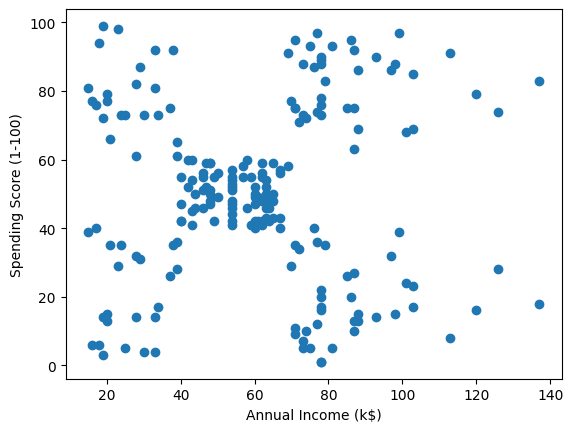

In [8]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[399.99999999999994,
 270.89235946739063,
 195.2466301907915,
 108.92131661364358,
 65.57885579985046,
 57.11147724296594,
 47.710583761307916,
 37.31912287833882,
 32.39226763033118,
 32.40246298115112,
 28.751291042159014,
 23.710344944514176,
 23.848393399486483,
 20.877880368245425,
 18.681695442209257,
 16.27860877692049,
 17.83632250802142,
 14.763920183001115,
 13.42240191419025,
 11.900757680608644]

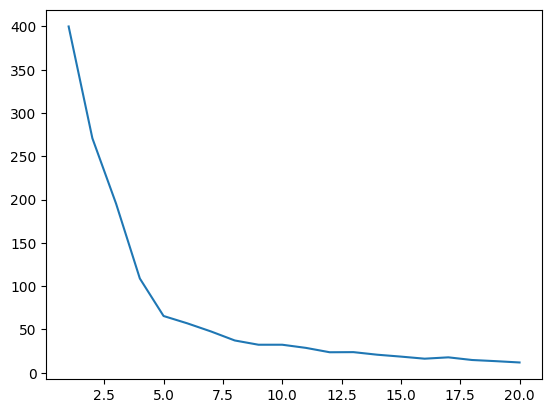

In [12]:
plt.plot(range(1,21), wcss)

In [13]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X_scaled)

In [14]:
y_means

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [15]:
X_scaled[y_means ==0]

array([[-0.82293289,  0.41927286],
       [-0.78476346,  0.18634349],
       [-0.78476346, -0.12422899],
       [-0.78476346, -0.3183368 ],
       [-0.78476346, -0.3183368 ],
       [-0.70842461,  0.06987881],
       [-0.70842461,  0.38045129],
       [-0.67025518,  0.14752193],
       [-0.67025518,  0.38045129],
       [-0.67025518, -0.20187212],
       [-0.67025518, -0.35715836],
       [-0.63208575, -0.00776431],
       [-0.63208575, -0.16305055],
       [-0.55574689,  0.03105725],
       [-0.55574689, -0.16305055],
       [-0.55574689,  0.22516505],
       [-0.55574689,  0.18634349],
       [-0.51757746,  0.06987881],
       [-0.51757746,  0.34162973],
       [-0.47940803,  0.03105725],
       [-0.47940803,  0.34162973],
       [-0.47940803, -0.00776431],
       [-0.47940803, -0.08540743],
       [-0.47940803,  0.34162973],
       [-0.47940803, -0.12422899],
       [-0.4412386 ,  0.18634349],
       [-0.4412386 , -0.3183368 ],
       [-0.40306917, -0.04658587],
       [-0.40306917,

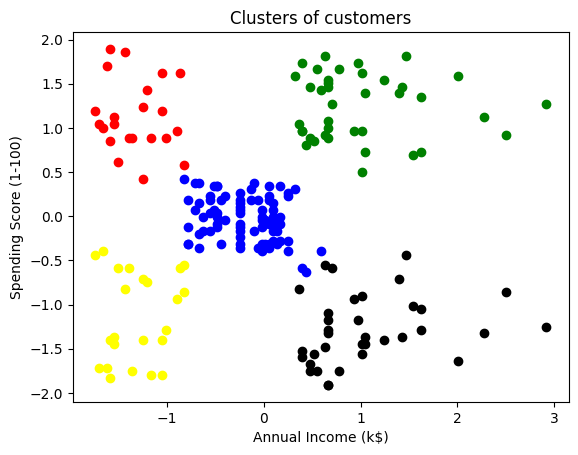

In [34]:
plt.scatter(X_scaled[y_means==0,0] , X_scaled[y_means==0,1], color='blue')
plt.scatter(X_scaled[y_means==1,0], X_scaled[y_means==1,1], color='red')
plt.scatter(X_scaled[y_means==2,0], X_scaled[y_means==2,1], color='green')
plt.scatter(X_scaled[y_means==3,0], X_scaled[y_means==3,1], color='yellow')
plt.scatter(X_scaled[y_means==4,0], X_scaled[y_means==4,1], color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()